# Bayes Decision Rule
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the calculation of **likelihood** of each features given particular class 
- implement the calculation of **posterior** of each class given particular feature
- implement the calculation of **minimal total risk** of bayes decision rule

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
data = sio.loadmat('data.mat')
x1_train, x1_test, x2_train, x2_test = data['x1_train'], data['x1_test'], data['x2_train'], data['x2_test']
all_x = np.concatenate([x1_train, x1_test, x2_train, x2_test], 1)
data_range = [np.min(all_x), np.max(all_x)]

In [3]:
print(x1_train.shape, x1_test.shape, x2_train.shape, x2_test.shape)
print(all_x.shape)
print(data_range)

(1, 400) (1, 100) (1, 800) (1, 200)
(1, 1500)
[-6, 12]


In [4]:
from get_x_distribution import get_x_distribution

train_x = get_x_distribution(x1_train, x2_train, data_range)
test_x = get_x_distribution(x1_test, x2_test, data_range)

In [5]:
print(train_x)
print(test_x)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   8.  62. 133. 128.
   61.   6.   1.   0.   0.]
 [  1.   3.   3.   9.  13.  45.  57.  71.  98.  98.  99. 104.  77.  54.
   30.  17.  14.   4.   3.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 12. 30. 43. 12.  1.  0.  0.
   0.]
 [ 0.  0.  0.  3. 10.  7.  9. 25. 24. 30. 24. 29.  9. 10. 13.  3.  3.  1.
   0.]]


## Part 1 likelihood
Your code for this section will be written inside **bayes_decision_rule/likehood.py**. 

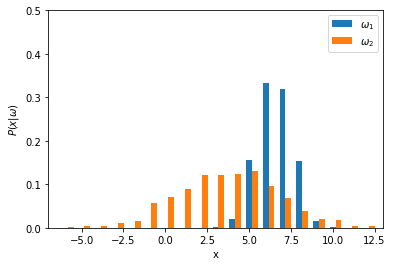

In [6]:
from likelihood import likelihood

l = likelihood(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), l.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, l.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(x|\omega)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 0.5])
plt.show()

In [7]:
#TODO
#compute the number of all the misclassified x using maximum likelihood decision rule

# begin answer
mask = [i[0]<i[1] for i in l.T]
misclassified_1 = test_x[0] * mask
misclassified_2 = test_x[1] * [~i for i in mask]
count_mis = sum(misclassified_1) + sum(misclassified_2)
test_error = count_mis / (x1_test.shape[1] + x2_test.shape[1])

print(mask)
print(misclassified_1)
print(misclassified_2)
print('number of misclassified x: %d' % count_mis)
print('test error: %.4f' % test_error)
# end answer


[True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, True, True, True, True]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 29.  9. 10. 13.  0.  0.  0.
  0.]
number of misclassified x: 64
test error: 0.2133


## Part 2 posterior
Your code for this section will be written inside **bayes_decision_rule/posterior.py**. 

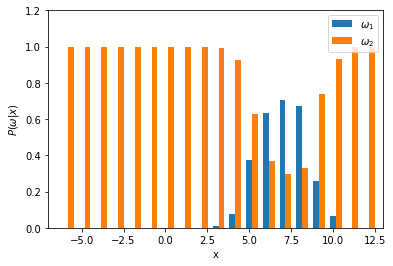

In [8]:
from posterior import posterior

p = posterior(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), p.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, p.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(\omega|x)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 1.2])
plt.show()

In [9]:
#TODO
#compute the number of all the misclassified x using optimal bayes decision rule

# begin answer
mask = [i[0]<i[1] for i in p.T]
misclassified_1 = test_x[0] * mask
misclassified_2 = test_x[1] * [~i for i in mask]
count_mis = sum(misclassified_1) + sum(misclassified_2)
test_error = count_mis / (x1_test.shape[1] + x2_test.shape[1])

print(mask)
print(misclassified_1)
print(misclassified_2)
print('number of misclassified x: %d' % count_mis)
print('test error: %.4f' % test_error)
# end answer


[True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 12.  0.  0.  0.  1.  0.  0.
  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9. 10. 13.  0.  0.  0.
  0.]
number of misclassified x: 47
test error: 0.1567


## Part 3 risk


In [10]:
risk = np.array([[0, 1], [2, 0]])
#TODO
#get the minimal risk using optimal bayes decision rule and risk weights

# begin answer
x1_all = np.concatenate([x1_train, x1_test], 1)
x2_all = np.concatenate([x2_train, x2_test], 1)
x_all = get_x_distribution(x1_all, x2_all, data_range)

prior_all = np.sum(x_all, axis=0) / np.sum(x_all)
post_all = posterior(x_all)

risk1 = np.sum(np.transpose([risk[0]]) * post_all, axis=0)
risk2 = np.sum(np.transpose([risk[1]]) * post_all, axis=0)
minimal_total_risk = np.sum(np.min([risk1, risk2], axis=0) * prior_all)

print('minimal total risk: %.4f' % minimal_total_risk)
# end answer

minimal total risk: 0.2427


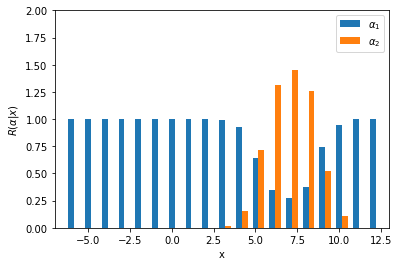

In [11]:
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), risk1, width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, risk2, width)
plt.xlabel('x')
plt.ylabel('$R(\\alpha|x)$')
plt.legend((p1[0], p2[0]), ('$\\alpha_1$', '$\\alpha_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 2.0])
plt.show()